In [3]:
import pandas as pd
import math

In [5]:
all_posts_df = pd.read_json('left_all_posts.json', lines=True)

In [6]:
# convertendo o tipo data que esta como string em objeto no formato data
all_posts_df["created_time"] = pd.to_datetime(all_posts_df['created_time'])

In [7]:

def extract_shares_property(share_object):
    try:
        return share_object["count"]
    except:
        return 0

def extract_reaction_property(object):
    try:
        return object["summary"]["total_count"]
    except:
        return 0


all_posts_df['shares'] = all_posts_df['shares'].apply(lambda x:extract_shares_property(x))
all_posts_df['reactions_like'] = all_posts_df['reactions_like'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_haha'] = all_posts_df['reactions_haha'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_wow'] = all_posts_df['reactions_wow'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_sad'] = all_posts_df['reactions_sad'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_angry'] = all_posts_df['reactions_angry'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_love'] = all_posts_df['reactions_love'].apply(lambda x:extract_reaction_property(x))

all_posts_df

,created_time,id,message,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love
0,2018-01-02 20:57:54+00:00,3.719132e+29,Jessé Souza no Canteiro Audiovisual / A Lava J...,96,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,141,0,0,0,1,11
1,2018-01-02 12:02:41+00:00,3.719132e+29,Filho de Henfil critica Blog do Noblat - O Glo...,22,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.18...,77,0,6,0,1,9
2,2018-01-02 11:46:03+00:00,3.719132e+29,"A briga vai ser dura, mas não vai ter moleza p...",895,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,511,287,4,0,0,62
3,2018-01-02 11:25:24+00:00,3.719132e+29,Geddel ameaça Michel Temer e diz que está pron...,973,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1002,59,20,3,10,30
4,2018-01-02 11:16:42+00:00,3.719132e+29,Zé Dirceu: “nós derrotamos a ditadura militar ...,549,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,725,10,2,0,6,46
...,...,...,...,...,...,...,...,...,...,...,...,...
76275,2021-10-17 21:19:42+00:00,6.543393e+30,São Bernardo do Campo| Educadora social Ju Den...,24,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,83,0,2,0,2,1
76276,2021-10-17 17:00:01+00:00,6.543393e+30,"Neste sábado, 16, milhares de pessoas saíram à...",59,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,216,1,0,0,1,23
76277,2021-10-17 16:00:14+00:00,6.543393e+30,NaN,5,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,65,3,0,1,0,1
76278,2021-10-17 15:20:04+00:00,6.543393e+30,O movimento dos entregadores contra o @ifoodbr...,22,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,99,0,0,0,1,3


In [8]:
column_names = ['shares', 'reactions_like', 'reactions_haha', 'reactions_wow','reactions_sad','reactions_angry','reactions_love']
all_posts_df['total_reactions']= all_posts_df[column_names].sum(axis=1)
all_posts_df

,created_time,id,message,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,total_reactions
0,2018-01-02 20:57:54+00:00,3.719132e+29,Jessé Souza no Canteiro Audiovisual / A Lava J...,96,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,141,0,0,0,1,11,249
1,2018-01-02 12:02:41+00:00,3.719132e+29,Filho de Henfil critica Blog do Noblat - O Glo...,22,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.18...,77,0,6,0,1,9,115
2,2018-01-02 11:46:03+00:00,3.719132e+29,"A briga vai ser dura, mas não vai ter moleza p...",895,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,511,287,4,0,0,62,1759
3,2018-01-02 11:25:24+00:00,3.719132e+29,Geddel ameaça Michel Temer e diz que está pron...,973,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1002,59,20,3,10,30,2097
4,2018-01-02 11:16:42+00:00,3.719132e+29,Zé Dirceu: “nós derrotamos a ditadura militar ...,549,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,725,10,2,0,6,46,1338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76275,2021-10-17 21:19:42+00:00,6.543393e+30,São Bernardo do Campo| Educadora social Ju Den...,24,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,83,0,2,0,2,1,112
76276,2021-10-17 17:00:01+00:00,6.543393e+30,"Neste sábado, 16, milhares de pessoas saíram à...",59,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,216,1,0,0,1,23,300
76277,2021-10-17 16:00:14+00:00,6.543393e+30,NaN,5,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,65,3,0,1,0,1,75
76278,2021-10-17 15:20:04+00:00,6.543393e+30,O movimento dos entregadores contra o @ifoodbr...,22,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,99,0,0,0,1,3,125


In [9]:
# def get_year(date):
#    print(date)
#    print(type(date))
#    return date.year

# df_to_group_by_year = all_posts_df.apply(lambda date:get_year(date))
# df_to_group_by_year
df_to_group_by_year = all_posts_df
df_to_group_by_year['created_time'] = df_to_group_by_year['created_time'].dt.year

grouped_by_year = df_to_group_by_year.groupby(['created_time',pd.Grouper(key='created_time')]).sum()
grouped_by_year.reset_index(level=0, inplace=True)
grouped_by_year

,created_time,id,shares,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,total_reactions
created_time,,,,,,,,,,
2018,2018,7.211283e+34,38171544,31198067,2580092,565879,3437346,1642661,10303918,87899507
2019,2019,8.648544e+34,16995584,24726072,2819824,464621,2701383,2483316,7660762,57851562
2020,2020,8.785915e+34,12881997,29285441,2415048,281052,4386136,2833495,8624200,60707369
2021,2021,1.000584e+35,8711778,27882618,2106334,169583,3649227,1895263,8440573,52855376


In [10]:
def convert_item_to_str(item):
    return str(item)

grouped_by_year['created_time'] = grouped_by_year['created_time'].apply(lambda item:convert_item_to_str(item))
# grouped_by_year['reactions_like'] = grouped_by_year['reactions_like'].apply(lambda item:convert_item_to_str(item))
# grouped_by_year['shares'] = grouped_by_year['shares'].apply(lambda item:convert_item_to_str(item))
# grouped_by_year['total_reactions'] = grouped_by_year['total_reactions'].apply(lambda item:convert_item_to_str(item))

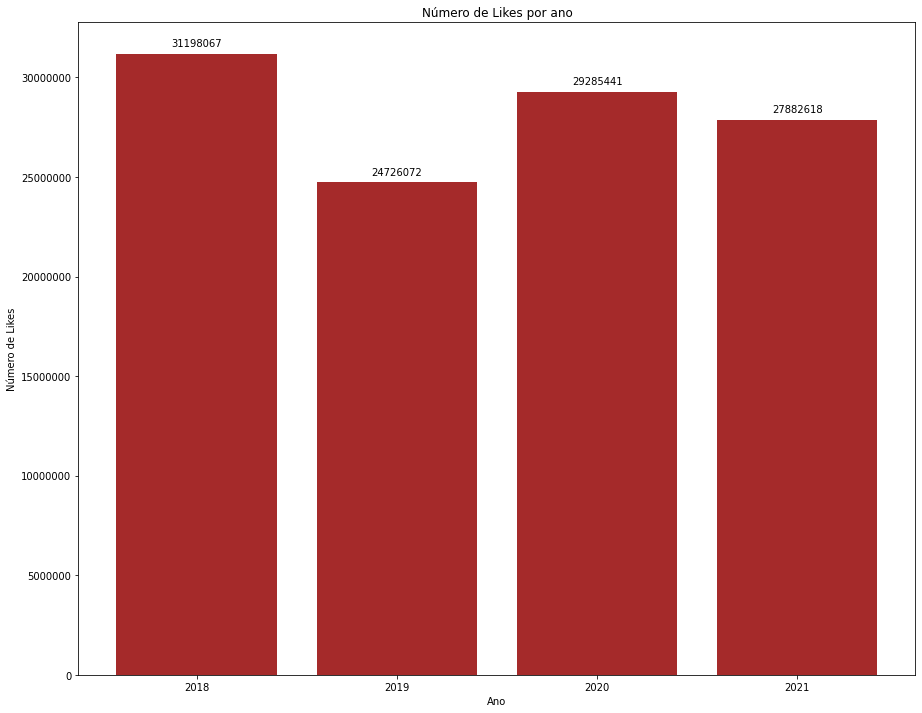

In [11]:
import matplotlib.pyplot as plt
import numpy as np # importing numpy
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12))

# Add x-axis and y-axis
#ax.bar(grouped_by_year['created_time'],
#    grouped_by_year['reactions_like'],
#       color='purple')

ax.bar(grouped_by_year['created_time'],grouped_by_year['reactions_like'],
       color='#A52A2A')

# Set title and labels for axes
ax.set(xlabel="Ano",
       ylabel="Número de Likes",
       title="Número de Likes por ano")
plt.ticklabel_format(style='plain', axis='y')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()

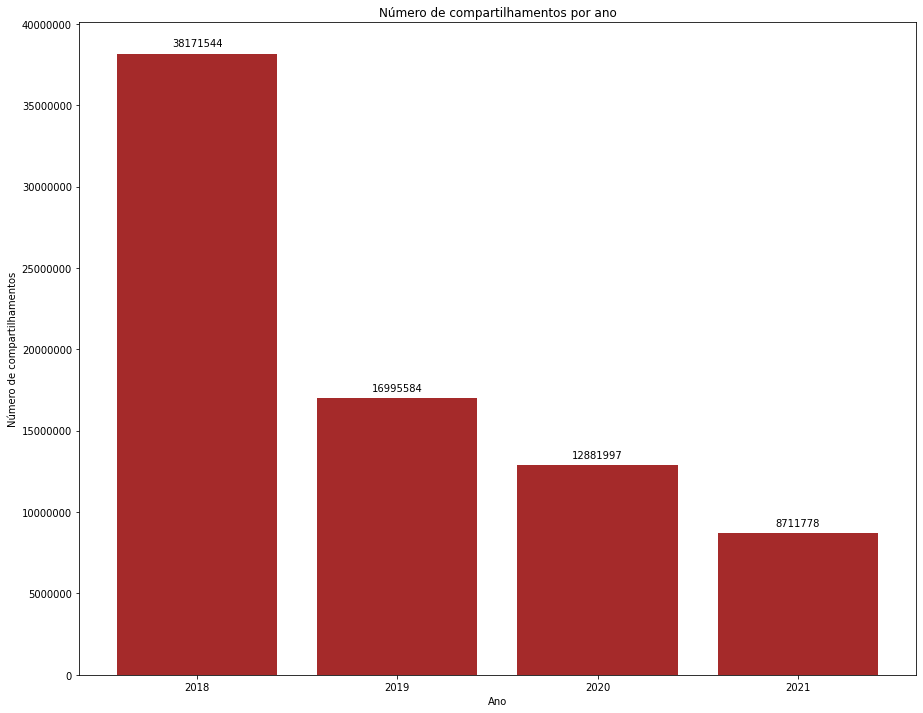

In [13]:

import matplotlib.pyplot as plt
import numpy as np # importing numpy
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12))

# Add x-axis and y-axis
#ax.bar(grouped_by_year['created_time'],
#    grouped_by_year['reactions_like'],
#       color='purple')

ax.bar(grouped_by_year['created_time'],grouped_by_year['shares'],
       color='#A52A2A')

# Set title and labels for axes
ax.set(xlabel="Ano",
       ylabel="Número de compartilhamentos",
       title="Número de compartilhamentos por ano")
plt.ticklabel_format(style='plain', axis='y')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()

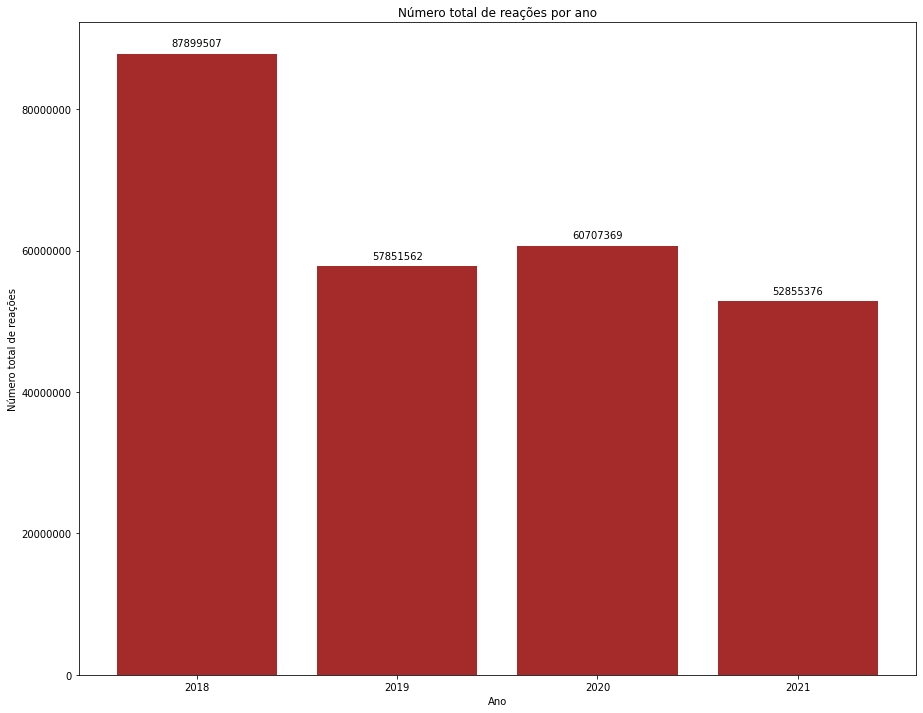

In [14]:

import matplotlib.pyplot as plt
import numpy as np # importing numpy
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12))

# Add x-axis and y-axis
#ax.bar(grouped_by_year['created_time'],
#    grouped_by_year['reactions_like'],
#       color='purple')

ax.bar(grouped_by_year['created_time'],grouped_by_year['total_reactions'],
       color='#A52A2A')

# Set title and labels for axes
ax.set(xlabel="Ano",
       ylabel="Número total de reações",
       title="Número total de reações por ano")
plt.ticklabel_format(style='plain', axis='y')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()